In [12]:
## Encode the player blackjack specific submodules
# Write the termination module here
# If having problems visualising flow, return to the casino visualisation.

# Casino Process: Player and dealer are dealt cards, player receives 21/blackjack and dealer will have a card. The player wins
# and there is an instant payout of 1.5x player bet, player adds to capital, and a new hand starts. 

import random
import pandas as pd
from matplotlib import pyplot

In [1]:
initial_capital = 50
capital_stock = [initial_capital]
bet_per_round = 1

In [2]:
def getcards(decks=1):
    """Brings out a number of sealed decks of cards in their original order to the virutal gaming table.

    Creates a dictionary tracking the name of each card, its quantity, and its value
    
    Keyword argument:
        decks {int} -- the number of 52-card decks that the casino is using (default 1)
    
    Returns:
        dictionary{keys: values} -- dictionary object where keys are the card name (e.g. 'K' for King )
                                    and where the values are a list object containing the card's quantity and its value.
                                    
    The value for the ace contains three elements, as aces can further take on the value of 1 or 11, depending on 
    the context of the hand. No distinction is made between card suits, i.e. spades, hearts, clubs, diamonds.
    """
    
    deck = {}
    total_cards = decks * 52
    card_quantity = int(total_cards / 13)
    
    deck['A'] = [card_quantity, 1, 11]

    for card in range(2, 11):
        deck[str(card)] = [card_quantity, card]
    
    for card in "JQK":
        deck[str(card)] = [card_quantity, 10]
        
    return deck, total_cards

In [3]:
def shuffler(deck, total_cards):
    
    """Shuffles the decks of cards, and places them inside the virtual gaming table card-shoe."""
    
    shuffled_shoe = []
    
    while len(shuffled_shoe) < total_cards:
        draw = random.choice(list(deck))
        if deck[draw][0] == 0:
            pass
        else:
            deck[draw][0] -= 1
            shuffled_shoe.append(draw)
            
    return shuffled_shoe

In [4]:
# For testing blackjack functionality, substitute for shuffled_shoe
# if testing is required. 

rigged_shoe = []

for card in "234567893AK":
    rigged_shoe.append(card)
    
print(rigged_shoe)

['2', '3', '4', '5', '6', '7', '8', '9', '3', 'A', 'K']


In [5]:
def openinghand():
    
    """Deals two cards to the player, and one to the dealer from the shuffled shoe. Outputs a message if there is Blackjack
    
    Cards are taken sequentially from the shuffled card shoe, beginning with the last element of the shuffled shoe list object
    and working in reverse order."""
    
    player = []
    dealer = []

    player.append(shuffled_shoe.pop())
    player.append(shuffled_shoe.pop())
    
    dealer.append(shuffled_shoe.pop())
    
    if ('A' in player) and (('10' in player) or ('J' in player) or ('Q' in player) or ('K' in player)):
        player_blackjack = 1
        print("Blackjack, house pays out at 3:2")
    else:
        player_blackjack = 0
        print("No Blackjack this time")
        
    return player, dealer, player_blackjack

In [6]:
def playerturn(player, player_blackjack):
    
    """Evaluates the player's score, and keeps drawing cards until the player has a score of more than 18"""
    
    if player_blackjack == 1:
        cardvalues = [21]
        print("It's my lucky day")
        
    else:
        cardvalues = []
        for card in player:
            cardvalues.append(deck[card][1])

        while sum(cardvalues) < 18:
            drawcard = shuffled_shoe.pop()
            player.append(drawcard)
            cardvalues.append(deck[drawcard][1])
            print("Decided to hit, as I'm a risk lover and under 18")
        
        if sum(cardvalues) > 21:
            print("...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?")
        else:
            print("Decided to stick")
        
        print("Player Score:" + str(sum(cardvalues)))
        print(player)
        
    return player, sum(cardvalues), player_blackjack

In [7]:
# Need to deal with the contingency in case where dealer gets an ace and when player blackjacks, and ensure that the module
# looks up the right value of ace.

def dealerturn(dealer, player_blackjack):
    
    """Evaluates the dealer's score, and keeps drawing cards until dealer has a score of 17 or more."""
    
    if player_blackjack == 1:
        cardvalues = [deck[dealer[0]][1]]
        print("Dealer draws no cards as player has blackjacked")
    else: 
        cardvalues = []
        for card in dealer:
            cardvalues.append(deck[card][1])
        
        while sum(cardvalues) <= 16:
            drawcard = shuffled_shoe.pop()
            dealer.append(drawcard)
            cardvalues.append(deck[drawcard][1])
            print("Dealer draws a card as under or equal to 16")
    
        if sum(cardvalues) > 21:
            print("Dealer goes bust")
        else:
            print("Dealer sticks on 17 or over")
    
        print("Dealer Score:" + str(sum(cardvalues)))
        print(dealer)
    
    return dealer, sum(cardvalues)

In [8]:
def handoutcome(playerscore, dealerscore, player_blackjack):
    
    """Compares player's and dealer's scores and encodes the outcome.
    
    Can be extended if analysis required tracking the evolution of this variable."""
    
    if player_blackjack == 1:
        hand_outcome = 3
        print("Player wins the hand with Blackjack")
    else:
        if playerscore > 21:
            if dealerscore > 21:
                hand_outcome = 0
                print("Player busts. Dealer also busts. But the 'edge' means that player loses the hand.")
            else:
                hand_outcome = 0
                print("Player busts. Dealer wins the hand.")
        else:
            if dealerscore > 21:
                hand_outcome = 1
                print("Dealer busts. Player wins the hand")
            else:
                if dealerscore > playerscore:
                    hand_outcome = 0
                    print("Dealer has higher score. Dealer wins the hand")
                elif dealerscore < playerscore:
                    hand_outcome = 1
                    print("Player has higher score. Player wins the hand")
                else:
                    hand_outcome = 2
                    print("Both dealer and player have the same score, the outcome of the hand is a draw")
    
    return hand_outcome

In [9]:
def payout_loss(hand_outcome):
    
    """Uses the outcome to calculate payoffs/losses, and updates player's capital stock accordingly."""
    
    global capital_stock
    
    if hand_outcome == 0:
        new_capital = capital_stock[-1] - bet_per_round
        capital_stock.append(new_capital)
        print("Player loses " + str(bet_per_round) + " pounds.")
    
    elif hand_outcome == 1:
        new_capital = capital_stock[-1] + bet_per_round
        capital_stock.append(new_capital)
        print("House pays out " + str(bet_per_round) + " pound.s")
        
    elif hand_outcome == 2:
        new_capital = capital_stock[-1]
        capital_stock.append(new_capital)
        print("Draw, no change to player's initial capital.")
        
    else:
        new_capital = capital_stock[-1] + (1.5 * bet_per_round)
        capital_stock.append(new_capital)
        print("Player blackjacks, house pays out " + str(1.5 * bet_per_round) + " pounds.")
        
    print("Player now has" + " " + str(capital_stock[-1]) + " " + "pounds remaining.")
        
    return capital_stock

In [10]:
def replenish_shoe(threshold):
    
    """Checks whether or not  we are near the end of a shoe. If so, discards the remaining cards in the current shoe,
    collects them together with remaining cards that were discarded in previous hands, reshuffles all of them togther,
    and finally replenishes the shoe."""
    
    global deck
    global total_cards
    global shuffled_shoe
    
    fraction_cards_remaining = len(shuffled_shoe) / total_cards
    
    if fraction_cards_remaining < threshold:
        shuffled_shoe.clear
        deck, total_cards = getcards(decks=1)
        shuffled_shoe = shuffler(deck, total_cards)
        print("As we are reaching near the end of the shoe, we will reshuffle")
    else:
        print("No need for reshuffling yet, as card threshold not reached")

    return shuffled_shoe

In [31]:
# This cell sets initial parameters and key variables Under a random seed,
# it should give exactly the same results.

random.seed(1)

initial_capital = 50
capital_stock = [initial_capital]
bet_per_round = 1

deck, total_cards = getcards(decks=1)
shuffled_shoe = shuffler(deck, total_cards)

In [32]:
# This is a for loop for testing the functionality of running the loop
# manually vs passing it through the simulator function.

iterations = 13

for iteration in range(iterations):
    
    player, dealer, player_blackjack = openinghand()
    player, playerscore, player_blackjack = playerturn(player, player_blackjack)
    dealer, dealerscore = dealerturn(dealer, player_blackjack)
    hand_outcome = handoutcome(playerscore, dealerscore, player_blackjack)
    capital_stock = payout_loss(hand_outcome)
    shuffled_shoe = replenish_shoe(0.25)

print(capital_stock)

No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to stick
Player Score:19
['3', '6', '10']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer goes bust
Dealer Score:24
['3', '6', '5', 'Q']
Dealer busts. Player wins the hand
House pays out 1 pound.s
Player now has 51 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:22
['3', '9', 'J']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:20
['5', '6', '9']
Player busts. Dealer wins the hand.
Player loses 1 pounds.
Player now has 50 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, a

In [41]:
random.seed(1)

In [25]:
# Simulator that also includes blackjack

initial_capital = 5000
capital_stock = [initial_capital]
bet_per_round = 10

deck, total_cards = getcards(decks=6)
shuffled_shoe = shuffler(deck, total_cards)

def blackjack_simulatorv2(iterations):
    
    for iteration in range(iterations):
        
        player, dealer, player_blackjack = openinghand()
        player, playerscore, player_blackjack = playerturn(player, player_blackjack)
        dealer, dealerscore = dealerturn(dealer, player_blackjack)
        hand_outcome = handoutcome(playerscore, dealerscore, player_blackjack)
        capital_stock = payout_loss(hand_outcome)
        shuffled_shoe = replenish_shoe(0.25)
    
    return capital_stock

In [26]:
blackjack_simulatorv2(1000)

No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to stick
Player Score:19
['8', '3', '3', '2', '3']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:19
['8', '2', 'A', '8']
Both dealer and player have the same score, the outcome of the hand is a draw
Draw, no change to player's initial capital.
Player now has 5000 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:24
['9', '2', '3', 'A', 'A', '8

['Q', 'Q']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:21
['A', 'Q', 'K']
Dealer has higher score. Dealer wins the hand
Player loses 10 pounds.
Player now has 4775.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:24
['A', 'A', '7', '3', '2', '10']
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:20
['10', 'K']
Player busts. Dealer wins the hand.
Player loses 10 pounds.
Player now has 4765.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to stick
Player Score:19

Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:17
['2', 'Q', '5']
Player has higher score. Player wins the hand
House pays out 10 pound.s
Player now has 4755.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to stick
Player Score:21
['9', '5', '7']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer goes bust
Dealer Score:22
['5', '10', '7']
Dealer busts. Player wins the hand
House pays out 10 pound.s
Player now has 4765.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to stick
Player Score:20
['K', 'Q']
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:19
['9', 'J']
Player has higher score. Player wins the hand
House pays out 10 pound.s
Player now has 4775.0 po

No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:22
['2', '8', '2', '10']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:20
['4', 'Q', '6']
Player busts. Dealer wins the hand.
Player loses 10 pounds.
Player now has 4795.0 pounds remaining.
As we are reaching near the end of the shoe, we will reshuffle
No Blackjack this time
Decided to stick
Player Score:20
['J', 'J']
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:19
['9', 'J']
Player has higher score. Player wins the hand
House pays out 10 pound.s
Player now has 4805.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I

['K', '7']
Player has higher score. Player wins the hand
House pays out 10 pound.s
Player now has 4690.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:25
['4', '9', '2', 'K']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer goes bust
Dealer Score:24
['8', '6', 'Q']
Player busts. Dealer also busts. But the 'edge' means that player loses the hand.
Player loses 10 pounds.
Player now has 4680.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:24

Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:24
['A', '5', '5', '2', 'A', '10']
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:20
['10', 'K']
Player busts. Dealer wins the hand.
Player loses 10 pounds.
Player now has 4600.0 pounds remaining.
No need for reshuffling yet, as card threshold not reached
No Blackjack this time
Decided to hit, as I'm a risk lover and under 18
...I've gone bust. Why is my lucky charm that I got from the Amazonian shaman not working?
Player Score:22
['5', '8', '9']
Dealer draws a card as under or equal to 16
Dealer draws a card as under or equal to 16
Dealer sticks on 17 or over
Dealer Score:20
['K', '2', '8']
Player busts. Dealer wins the hand.
Player loses 10 pounds.
Player now has 4590.0 pounds remaining.
No need for 

[5000,
 5000,
 4990,
 5000,
 5010,
 5000,
 5010,
 5000,
 5000,
 5010,
 5020,
 5035.0,
 5025.0,
 5015.0,
 5025.0,
 5015.0,
 5005.0,
 5015.0,
 5005.0,
 5015.0,
 5005.0,
 5015.0,
 5015.0,
 5005.0,
 4995.0,
 4985.0,
 4975.0,
 4965.0,
 4965.0,
 4975.0,
 4965.0,
 4955.0,
 4945.0,
 4955.0,
 4945.0,
 4935.0,
 4925.0,
 4915.0,
 4925.0,
 4915.0,
 4915.0,
 4925.0,
 4935.0,
 4945.0,
 4955.0,
 4945.0,
 4955.0,
 4945.0,
 4935.0,
 4945.0,
 4935.0,
 4925.0,
 4915.0,
 4905.0,
 4895.0,
 4905.0,
 4915.0,
 4925.0,
 4925.0,
 4915.0,
 4905.0,
 4915.0,
 4925.0,
 4935.0,
 4950.0,
 4940.0,
 4930.0,
 4920.0,
 4930.0,
 4920.0,
 4910.0,
 4925.0,
 4915.0,
 4905.0,
 4895.0,
 4905.0,
 4915.0,
 4905.0,
 4915.0,
 4925.0,
 4935.0,
 4925.0,
 4915.0,
 4905.0,
 4915.0,
 4915.0,
 4925.0,
 4935.0,
 4935.0,
 4950.0,
 4960.0,
 4950.0,
 4940.0,
 4950.0,
 4940.0,
 4930.0,
 4920.0,
 4920.0,
 4920.0,
 4910.0,
 4925.0,
 4940.0,
 4930.0,
 4920.0,
 4930.0,
 4920.0,
 4930.0,
 4920.0,
 4910.0,
 4900.0,
 4910.0,
 4920.0,
 4910.0,
 4920

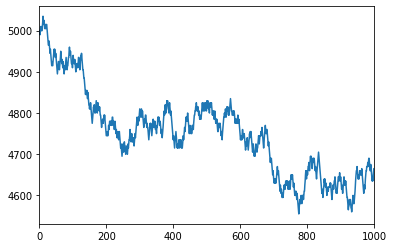

In [27]:
# Print the plot of player's capital stock as a function of time

series = pd.Series(capital_stock)
series.plot()
pyplot.show()